In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy
import seaborn as sns
from scipy import stats
import harry_plotter as hp

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [2]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/final_plots/cw_mass_split/'

# initiating catalog class object for all galaxies.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)
total_cen = copy.deepcopy(total) ; total_sat = copy.deepcopy(total)
total_high_mass = copy.deepcopy(total) ; total_low_mass = copy.deepcopy(total) 

total_cen.group_membership(sel='cen', group_cat='lim') 
total_sat.group_membership(sel='sat', group_cat='lim') 
total_cen_high_mass = copy.deepcopy(total_cen) ; total_cen_low_mass = copy.deepcopy(total_cen) 
total_sat_high_mass = copy.deepcopy(total_sat) ; total_sat_low_mass = copy.deepcopy(total_sat) 

# also splitting on stellar mass.
mass_split = 10 #total.df.nsa_elpetro_mass_logscale.median()
total_low_mass.df = total_low_mass.df[total_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_high_mass.df = total_high_mass.df[total_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

total_cen_low_mass.df = total_cen_low_mass.df[total_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_cen_high_mass.df = total_cen_high_mass.df[total_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

total_sat_low_mass.df = total_sat_low_mass.df[total_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_sat_high_mass.df = total_sat_high_mass.df[total_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

In [3]:
mass_split = 10

# creating composite catalogues for LTGs
ltgs = copy.deepcopy(total) ; ltgs.select_morphology('ltg')
ltgs_cen = copy.deepcopy(total_cen) ; ltgs_cen.select_morphology('ltg')
ltgs_sat = copy.deepcopy(total_sat) ; ltgs_sat.select_morphology('ltg')
ltgs_high_mass = copy.deepcopy(ltgs) ; ltgs_low_mass = copy.deepcopy(ltgs) 

ltgs_cen_high_mass = copy.deepcopy(ltgs_cen) ; ltgs_cen_low_mass = copy.deepcopy(ltgs_cen) 
ltgs_sat_high_mass = copy.deepcopy(ltgs_sat) ; ltgs_sat_low_mass = copy.deepcopy(ltgs_sat) 

# also splitting on stellar mass.
ltgs_low_mass.df = ltgs_low_mass.df[ltgs_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
ltgs_high_mass.df = ltgs_high_mass.df[ltgs_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

ltgs_cen_low_mass.df = ltgs_cen_low_mass.df[ltgs_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
ltgs_cen_high_mass.df = ltgs_cen_high_mass.df[ltgs_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

ltgs_sat_low_mass.df = ltgs_sat_low_mass.df[ltgs_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
ltgs_sat_high_mass.df = ltgs_sat_high_mass.df[ltgs_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

# creating composite catalogues for s0sa
s0sa = copy.deepcopy(total) ; s0sa.select_morphology('s0sa')
s0sa_cen = copy.deepcopy(total_cen) ; s0sa_cen.select_morphology('s0sa')
s0sa_sat = copy.deepcopy(total_sat) ; s0sa_sat.select_morphology('s0sa')
s0sa_high_mass = copy.deepcopy(s0sa) ; s0sa_low_mass = copy.deepcopy(s0sa) 

s0sa_cen_high_mass = copy.deepcopy(s0sa_cen) ; s0sa_cen_low_mass = copy.deepcopy(s0sa_cen) 
s0sa_sat_high_mass = copy.deepcopy(s0sa_sat) ; s0sa_sat_low_mass = copy.deepcopy(s0sa_sat) 

# also splitting on stellar mass.
s0sa_low_mass.df = s0sa_low_mass.df[s0sa_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
s0sa_high_mass.df = s0sa_high_mass.df[s0sa_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

s0sa_cen_low_mass.df = s0sa_cen_low_mass.df[s0sa_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
s0sa_cen_high_mass.df = s0sa_cen_high_mass.df[s0sa_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

s0sa_sat_low_mass.df = s0sa_sat_low_mass.df[s0sa_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
s0sa_sat_high_mass.df = s0sa_sat_high_mass.df[s0sa_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

# creating composite catalogues for sbsd
sbsd = copy.deepcopy(total) ; sbsd.select_morphology('sbsd')
sbsd_cen = copy.deepcopy(total_cen) ; sbsd_cen.select_morphology('sbsd')
sbsd_sat = copy.deepcopy(total_sat) ; sbsd_sat.select_morphology('sbsd')
sbsd_high_mass = copy.deepcopy(sbsd) ; sbsd_low_mass = copy.deepcopy(sbsd) 

sbsd_cen_high_mass = copy.deepcopy(sbsd_cen) ; sbsd_cen_low_mass = copy.deepcopy(sbsd_cen) 
sbsd_sat_high_mass = copy.deepcopy(sbsd_sat) ; sbsd_sat_low_mass = copy.deepcopy(sbsd_sat) 

# also splitting on stellar mass.
sbsd_low_mass.df = sbsd_low_mass.df[sbsd_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
sbsd_high_mass.df = sbsd_high_mass.df[sbsd_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

sbsd_cen_low_mass.df = sbsd_cen_low_mass.df[sbsd_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
sbsd_cen_high_mass.df = sbsd_cen_high_mass.df[sbsd_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

sbsd_sat_low_mass.df = sbsd_sat_low_mass.df[sbsd_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
sbsd_sat_high_mass.df = sbsd_sat_high_mass.df[sbsd_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

# $D_{node}$

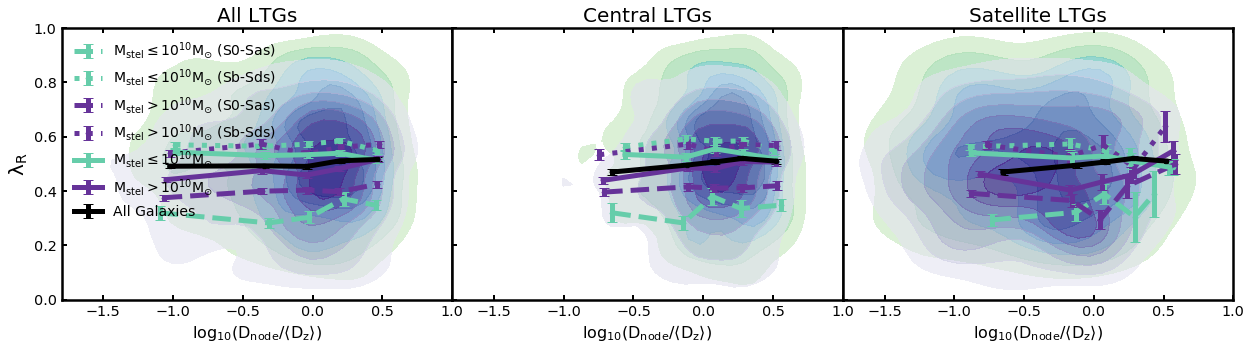

In [19]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(ltgs.df.log_dnode_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(ltgs_low_mass.df.log_dnode_norm, ltgs_low_mass.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(ltgs_high_mass.df.log_dnode_norm, ltgs_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (S0-Sas)', ax[0], colors=['mediumaquamarine'], linestyle='dashed')
sbsd_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (Sb-Sds)', ax[0], colors=['mediumaquamarine'], linestyle='dotted')
s0sa_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (S0-Sas)', ax[0], colors=['rebeccapurple'], linestyle='dashed')
sbsd_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (Sb-Sds)', ax[0], colors=['rebeccapurple'], linestyle='dotted')

ltgs_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
ltgs_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[0], colors=['rebeccapurple'])
ltgs.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])

# centrals only
x_bins = np.percentile(ltgs_cen.df.log_dnode_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(ltgs_cen_low_mass.df.log_dnode_norm, ltgs_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(ltgs_cen_high_mass.df.log_dnode_norm, ltgs_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_cen_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (S0-Sas)', ax[1], colors=['mediumaquamarine'], linestyle='dashed')
sbsd_cen_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (Sb-Sds)', ax[1], colors=['mediumaquamarine'], linestyle='dotted')
s0sa_cen_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (S0-Sas)', ax[1], colors=['rebeccapurple'], linestyle='dashed')
sbsd_cen_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (Sb-Sds)', ax[1], colors=['rebeccapurple'], linestyle='dotted')

ltgs_cen_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
ltgs_cen_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[1], colors=['rebeccapurple'])
ltgs_cen.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])

# satellites only
x_bins = np.percentile(ltgs_cen.df.log_dnode_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(ltgs_sat_low_mass.df.log_dnode_norm, ltgs_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(ltgs_sat_high_mass.df.log_dnode_norm, ltgs_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_sat_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (S0-Sas)', ax[2], colors=['mediumaquamarine'], linestyle='dashed')
sbsd_sat_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (Sb-Sds)', ax[2], colors=['mediumaquamarine'], linestyle='dotted')
s0sa_sat_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (S0-Sas)', ax[2], colors=['rebeccapurple'], linestyle='dashed')
sbsd_sat_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (Sb-Sds)', ax[2], colors=['rebeccapurple'], linestyle='dotted')

ltgs_sat_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
ltgs_sat_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[2], colors=['rebeccapurple'])
ltgs_cen.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])

titles = ['All LTGs', 'Central LTGs', 'Satellite LTGs']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{node} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-1.8, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

# $D_{skel}$

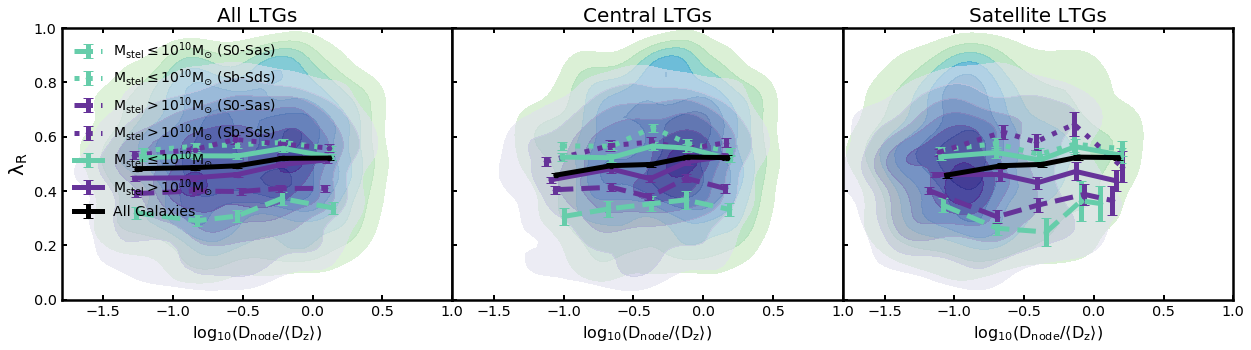

In [20]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(ltgs.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(ltgs_low_mass.df.log_dskel_norm, ltgs_low_mass.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(ltgs_high_mass.df.log_dskel_norm, ltgs_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (S0-Sas)', ax[0], colors=['mediumaquamarine'], linestyle='dashed')
sbsd_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (Sb-Sds)', ax[0], colors=['mediumaquamarine'], linestyle='dotted')
s0sa_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (S0-Sas)', ax[0], colors=['rebeccapurple'], linestyle='dashed')
sbsd_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (Sb-Sds)', ax[0], colors=['rebeccapurple'], linestyle='dotted')

ltgs_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
ltgs_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[0], colors=['rebeccapurple'])
ltgs.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])

# centrals only
x_bins = np.percentile(ltgs_cen.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(ltgs_cen_low_mass.df.log_dskel_norm, ltgs_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(ltgs_cen_high_mass.df.log_dskel_norm, ltgs_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_cen_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (S0-Sas)', ax[1], colors=['mediumaquamarine'], linestyle='dashed')
sbsd_cen_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (Sb-Sds)', ax[1], colors=['mediumaquamarine'], linestyle='dotted')
s0sa_cen_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (S0-Sas)', ax[1], colors=['rebeccapurple'], linestyle='dashed')
sbsd_cen_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (Sb-Sds)', ax[1], colors=['rebeccapurple'], linestyle='dotted')

ltgs_cen_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
ltgs_cen_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[1], colors=['rebeccapurple'])
ltgs_cen.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])

# satellites only
x_bins = np.percentile(ltgs_cen.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(ltgs_sat_low_mass.df.log_dskel_norm, ltgs_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(ltgs_sat_high_mass.df.log_dskel_norm, ltgs_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_sat_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (S0-Sas)', ax[2], colors=['mediumaquamarine'], linestyle='dashed')
sbsd_sat_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$ (Sb-Sds)', ax[2], colors=['mediumaquamarine'], linestyle='dotted')
s0sa_sat_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (S0-Sas)', ax[2], colors=['rebeccapurple'], linestyle='dashed')
sbsd_sat_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$ (Sb-Sds)', ax[2], colors=['rebeccapurple'], linestyle='dotted')

ltgs_sat_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
ltgs_sat_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[2], colors=['rebeccapurple'])
ltgs_cen.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])

titles = ['All LTGs', 'Central LTGs', 'Satellite LTGs']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{node} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-1.8, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()